In [16]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [17]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [27]:
from bitarray import bitarray

In [28]:
# @profile
def read_grid(filename):
    grid = []
    with open(filename) as f:
        w, h = map(int, f.readline().split(maxsplit=1))
        
        for y in range(h+2):
            grid.append([0]*(w+2))
        
        for no, line in enumerate(f):
            try:
                y, x = map(int, line.split(maxsplit=1))

                if y < 0 or x < 0:
                    raise ValueError

            except ValueError:
                raise Exception(f"Invalid cell on line {no + 2}.")

            grid[y+1][x+1] = 1

    return grid

Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [29]:
# @profile
def tick(grid):
    h, w = len(grid)-2, len(grid[0])-2

    nextgrid = []
    for y in range(h+2):
        nextgrid.append([0]*(w+2))

    for y, row in enumerate(grid[1:-1]):
        for x, cell in enumerate(row[1:-1]):
            count =0
            count += grid[y][x] 
            count += grid[y][x+1]
            count += grid[y][x+2] 
            count += grid[y+1][x] 
            count += grid[y+1][x+2] 
            count += grid[y+2][x] 
            count += grid[y+2][x+1] 
            count += grid[y+2][x+2]
            nextgrid[y+1][x+1] = 1 if count == 3 or (cell and count == 2) else 0

    return nextgrid

In [30]:
filename = "data/input_5x5.txt"

In [31]:
%lprun -f read_grid read_grid(filename)
grid = read_grid(filename)

Timer unit: 1e-07 s

Total time: 0.0005967 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\3667211519.py
Function: read_grid at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def read_grid(filename):
     3         1         17.0     17.0      0.3      grid = []
     4         2       3062.0   1531.0     51.3      with open(filename) as f:
     5         1       1581.0   1581.0     26.5          w, h = map(int, f.readline().split(maxsplit=1))
     6                                                   
     7         8        129.0     16.1      2.2          for y in range(h+2):
     8         7        160.0     22.9      2.7              grid.append([0]*(w+2))
     9                                                   
    10         6        553.0     92.2      9.3          for no, line in enumerate(f):
    11         5         45.0      9.0      0.8              try:
    12         5        227.0     45.4 

In [32]:
grid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [33]:
%lprun -f tick tick (grid)
nextgrid = tick(grid)

Timer unit: 1e-07 s

Total time: 0.0002096 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\2116683384.py
Function: tick at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def tick(grid):
     3         1         36.0     36.0      1.7      h, w = len(grid)-2, len(grid[0])-2
     4                                           
     5         1          9.0      9.0      0.4      nextgrid = []
     6         8        110.0     13.8      5.2      for y in range(h+2):
     7         7        164.0     23.4      7.8          nextgrid.append([0]*(w+2))
     8                                           
     9         6         84.0     14.0      4.0      for y, row in enumerate(grid[1:-1]):
    10        30        230.0      7.7     11.0          for x, cell in enumerate(row[1:-1]):
    11        25        116.0      4.6      5.5              count =0
    12        25        150.0      6.0      7.2              cou

In [34]:
nextgrid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [35]:
num_generations = 4

nextgrid = grid.copy()
for i in range(num_generations):
    nextgrid = tick(nextgrid)

nextgrid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0]]

**Memory Profiler Results for the same code**


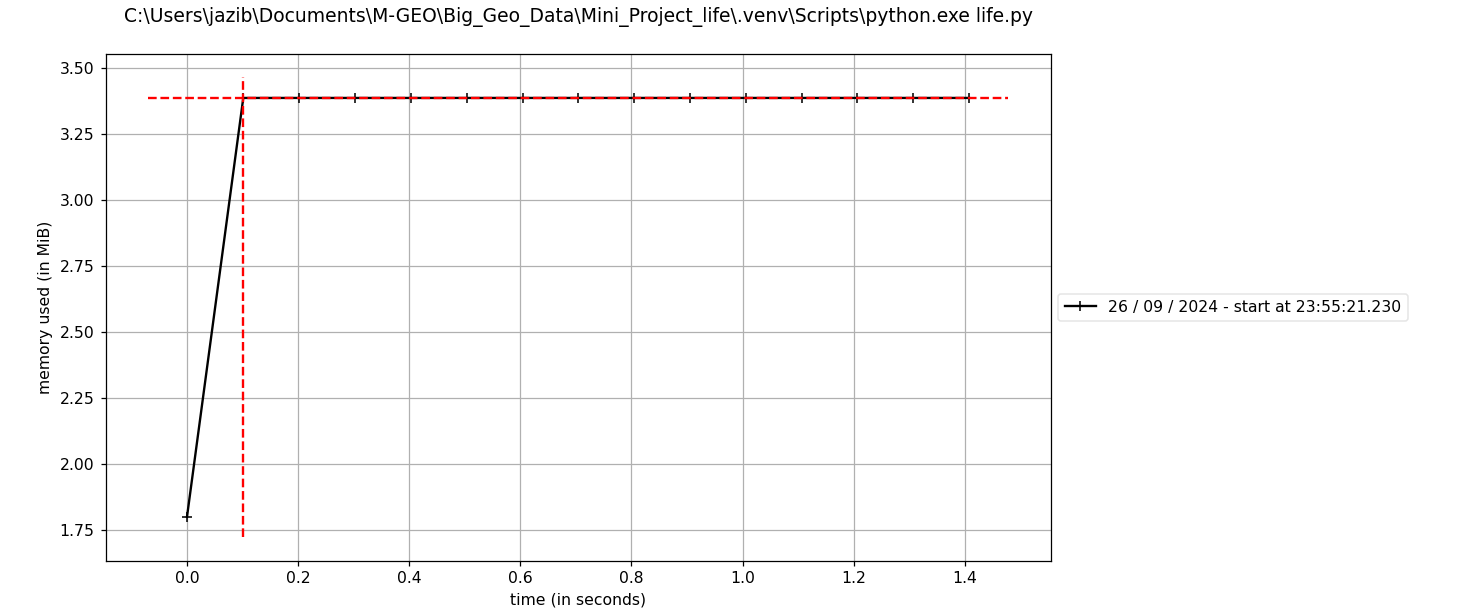